In [1]:
import pandas as pd
import json
import mysql.connector
import numpy as np             
import matplotlib.pyplot as plt
import pprint
import math
import os
import gc
import random
import seaborn as sns
from IPython.display import Markdown, display
from scipy import stats  
import plotly.express as px
from scipy.stats import shapiro, probplot, zscore, boxcox

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

In [2]:
with open('config/db_config.json', 'r') as config_file:
    db_config = json.load(config_file)

In [3]:
conn = mysql.connector.connect(
    host=db_config['host'],
    port=db_config['port'],
    user=db_config['user'],
    password=db_config['password'],
    database=db_config['database']
)

In [4]:
sql_query =""" select * from album """
album = pd.read_sql(sql_query, conn)
sql_query2 =""" select * from artist """
artist = pd.read_sql(sql_query2, conn)
sql_query3 =""" select * from customer """
customer = pd.read_sql(sql_query3, conn)
sql_query4 =""" select * from employee """
employee = pd.read_sql(sql_query4, conn)
sql_query5 =""" select * from genre """
genre = pd.read_sql(sql_query5, conn)
sql_query6 =""" select * from invoice """
invoice = pd.read_sql(sql_query6, conn)
sql_query7 =""" select * from invoiceline """
invoiceline = pd.read_sql(sql_query7, conn)
sql_query8 =""" select * from mediatype """
mediatype = pd.read_sql(sql_query8, conn)
sql_query9 =""" select * from playlist """
playlist = pd.read_sql(sql_query9, conn)
sql_query10 =""" select * from playlisttrack """
playlisttrack = pd.read_sql(sql_query10, conn)
sql_query11 =""" select * from track """
track = pd.read_sql(sql_query11, conn)

C:\Users\arell\AppData\Local\Temp\ipykernel_12252\3761654851.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  album = pd.read_sql(sql_query, conn)
C:\Users\arell\AppData\Local\Temp\ipykernel_12252\3761654851.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  artist = pd.read_sql(sql_query2, conn)
C:\Users\arell\AppData\Local\Temp\ipykernel_12252\3761654851.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer = pd.read_sql(sql_query3, conn)
C:\Users\arell\AppData\Local\Temp\ipykernel_12252\3761654851.py:8: UserWa

In [5]:
dataframes = [album, artist, customer, employee, genre, invoice, invoiceline, mediatype, playlist, playlisttrack, track]

# List of DataFrame names corresponding to the DataFrames
df_names = ['album', 'artist', 'customer', 'employee', 'genre', 'invoice', 'invoiceline', 'mediatype', 'playlist', 'playlisttrack', 'track']

# Function to display DataFrame information
def display_dataframe_info(df, df_name):
    print(f"Info for DataFrame '{df_name}':")
    df.info()
    print("\n")
    
# Iterate over the DataFrames and display their info
for track, name in zip(dataframes, df_names):
    display_dataframe_info(track, name)

Info for DataFrame 'album':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


Info for DataFrame 'artist':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


Info for DataFrame 'customer':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-nul

In [6]:
# Check each DataFrame for null columns
for df_name, track in zip(df_names, dataframes):
    null_columns = track.columns[track.isnull().any()].tolist()
    if null_columns:
        print(f"{df_name} has null values in columns: {null_columns}")

customer has null values in columns: ['Company', 'State', 'PostalCode', 'Phone', 'Fax']
employee has null values in columns: ['ReportsTo']
invoice has null values in columns: ['BillingState', 'BillingPostalCode']
track has null values in columns: ['Composer']


In [7]:
dataframes = [album, artist, customer, employee, genre, invoice, invoiceline, mediatype, playlist, playlisttrack, track]

# List of DataFrame names corresponding to the DataFrames
df_names = ['album', 'artist', 'customer', 'employee', 'genre', 'invoice', 'invoiceline', 'mediatype', 'playlist', 'playlisttrack', 'track']

# Function to display DataFrame information
def display_dataframe_info(df, df_name):
    print(f"number of null for DataFrame '{df_name}':")
    num = df.isnull().sum()
    print(num)
    
# Iterate over the DataFrames and display their info
for track, name in zip(dataframes, df_names):
    display_dataframe_info(track, name)

number of null for DataFrame 'album':
AlbumId     0
Title       0
ArtistId    0
dtype: int64
number of null for DataFrame 'artist':
ArtistId    0
Name        0
dtype: int64
number of null for DataFrame 'customer':
CustomerId       0
FirstName        0
LastName         0
Company         49
Address          0
City             0
State           29
Country          0
PostalCode       4
Phone            1
Fax             47
Email            0
SupportRepId     0
dtype: int64
number of null for DataFrame 'employee':
EmployeeId    0
LastName      0
FirstName     0
Title         0
ReportsTo     1
BirthDate     0
HireDate      0
Address       0
City          0
State         0
Country       0
PostalCode    0
Phone         0
Fax           0
Email         0
dtype: int64
number of null for DataFrame 'genre':
GenreId    0
Name       0
dtype: int64
number of null for DataFrame 'invoice':
InvoiceId              0
CustomerId             0
InvoiceDate            0
BillingAddress         0
BillingCity    

In [8]:
dataframes = {
    'album': album,
    'artist': artist,
    'customer': customer,
    'employee': employee,
    'genre': genre,
    'invoice': invoice,
    'invoiceline': invoice,
    'mediatype': mediatype,
    'playlist': playlist,
    'playlisttrack': playlisttrack,
    'track': invoice,
}

# Function to drop duplicates for each DataFrame
def drop_duplicates_for_all_dfs(dfs):
    for name, df in dfs.items():
        # Drop duplicates
        original_count = df.shape[0]
        df_cleaned = df.drop_duplicates()
        cleaned_count = df_cleaned.shape[0]
        
        # Print results
        print(f"Dropped duplicates from '{name}': {original_count - cleaned_count} duplicates removed.")
        
        # Update the dictionary with the cleaned DataFrame
        dfs[name] = df_cleaned

    return dfs

# Drop duplicates and update the DataFrames
cleaned_dataframes = drop_duplicates_for_all_dfs(dataframes)

Dropped duplicates from 'album': 0 duplicates removed.
Dropped duplicates from 'artist': 0 duplicates removed.
Dropped duplicates from 'customer': 0 duplicates removed.
Dropped duplicates from 'employee': 0 duplicates removed.
Dropped duplicates from 'genre': 0 duplicates removed.
Dropped duplicates from 'invoice': 0 duplicates removed.
Dropped duplicates from 'invoiceline': 0 duplicates removed.
Dropped duplicates from 'mediatype': 0 duplicates removed.
Dropped duplicates from 'playlist': 0 duplicates removed.
Dropped duplicates from 'playlisttrack': 0 duplicates removed.
Dropped duplicates from 'track': 0 duplicates removed.


In [9]:
# Function to describe categorical columns in each DataFrame
def describe_categorical_dfs(dfs):
    descriptions = {}
    for name, df in dfs.items():
        # Select only categorical columns
        categorical_cols = df.select_dtypes(include='object')
        
        if not categorical_cols.empty:
            # Get description for categorical columns
            description = categorical_cols.describe()
            descriptions[name] = description
            
            # Print the description
            print(f"Description of categorical columns in '{name}':")
            print(description)
            print("\n" + "="*40 + "\n")  # Separator for readability
        else:
            print(f"No categorical columns in '{name}'.")

    return descriptions

# Describe categorical columns in all DataFrames
descriptions = describe_categorical_dfs(dataframes)

Description of categorical columns in 'album':
                                                    Title
count                                                 347
unique                                                347
top     Koyaanisqatsi (Soundtrack from the Motion Pict...
freq                                                    1


Description of categorical columns in 'artist':
                         Name
count                     275
unique                    275
top     Philip Glass Ensemble
freq                        1


Description of categorical columns in 'customer':
       FirstName   LastName                                           Company  \
count         59         59                                                10   
unique        57         59                                                10   
top        Frank  Gonçalves  Embraer - Empresa Brasileira de Aeronáutica S.A.   
freq           2          1                                                 1   

     

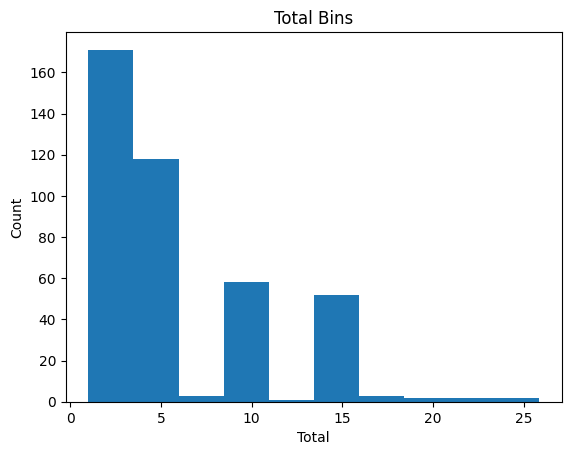

**Value Range**

Low ( 0.99 -  9.28)

Medium ( 9.28 -  17.57)

High ( 17.57 -  25.86)

,Total,Total-binned
0,1.98,Low
1,3.96,Low
2,5.94,Low
3,8.91,Low
4,13.86,Medium
5,0.99,Low
6,1.98,Low
7,1.98,Low
8,3.96,Low
9,5.94,Low


<br>**Binning Distribution**<br>

Total-binned
Low       347
Medium     58
High        7
Name: count, dtype: int64

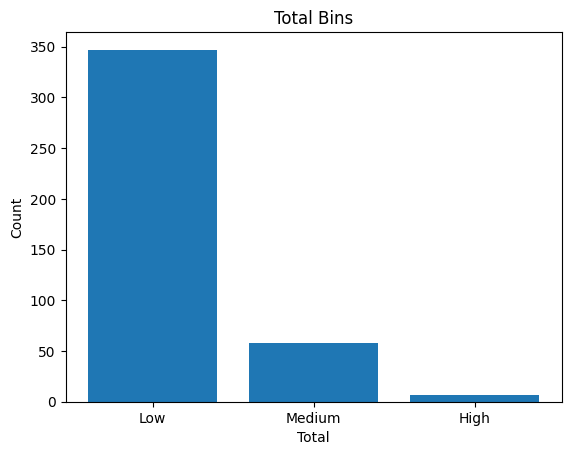

In [10]:
def binning_feature(feature):
    plt.hist(invoice[feature])

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

    bins = np.linspace(min(invoice[feature]), max(invoice[feature]), 4)
    
    printmd("**Value Range**")
    
    printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
    printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
    printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")

    group_names = ['Low', 'Medium', 'High']

    invoice.insert(invoice.shape[1]-1,f'{feature}-binned', pd.cut(invoice[feature], bins, labels=group_names, include_lowest=True))
    display(invoice[[feature, f'{feature}-binned']].head(10))


    # count values
    printmd("<br>**Binning Distribution**<br>")
    display(invoice[f'{feature}-binned'].value_counts())


    # plot the distribution of each bin
    plt.bar(group_names, invoice[f'{feature}-binned'].value_counts())
    # px.bar(data_canada, x='year', y='pop')

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

binning_feature('Total')